## 평균 검정 - 2 sample t-test

### [연습] 2-sample t-test

In [33]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.proportion import proportions_ztest


In [15]:
df1 = pd.DataFrame({'sample':[6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7]})
df2 = pd.DataFrame({'sample':[7,5,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]})

# 정규성 검정
shapiro(df1) # (0.9094840288162231, 0.06230909377336502) => (검정통계량, pvalue) pvalue > a(0.05) : 정규성이 있다.
shapiro(df2)  # (0.8978105783462524, 0.03752673789858818) => (검정통계량, pvalue) pvalue > a(0.05) : 정규성이 있다.

# 등분산성 검정  # 0.827(pvalue) > 0.05(유의수준) => 등분산성이 있다.
stats.levene(df1['sample'],df2['sample']) # LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)

LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)

In [20]:
# 2 Sample t-test
t_result = stats.ttest_ind(df1,df2, equal_var=True)

# 2 sample t-test의 t값 p값 저장
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 출력 t,p
print(t,p)  # [-3.122] [0.003] <- 검정통계량, pvalue

# 유의수준 > pvalue 이므로 두 집단 간의 차이가 있다.

[-3.122] [0.003]


### [실습] 2-sample t-test

In [24]:
df1 = pd.DataFrame({'sample':[1.883,1.715,1.799,1.768,1.711,1.832,1.427,1.344]})
df2 = pd.DataFrame({'sample':[1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.883]})

# 정규성 검정
print(shapiro(df1)) # 정규성 있다 
print(shapiro(df2)) # 정규성 없다

# 등분산성 검정 
print(stats.levene(df1['sample'],df2['sample'])) # 등분산성 있다

# 2 Sample t-test
t_result = stats.ttest_ind(df1,df2, equal_var=True)

# 2 sample t-test의 t값 p값 저장
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 출력 t,p
print(t,p)

# pvalue > 0.05 : A 공급자와 B 공급자가 납품한 제품의 두께가 차이가 있다고 할 수 없다.

(0.8425756096839905, 0.08004552870988846)
(0.7734811902046204, 0.014793740585446358)
LeveneResult(statistic=0.4408416728536036, pvalue=0.5175025061092301)
[1.7] [0.111]


### [연습] Paired t-test

In [27]:
df1 = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]})
df2 = pd.DataFrame({'after':[810,670,790,712,810,670,790,712,790,712]})

t_result = stats.ttest_rel(df1,df2)

t,p = t_result.statistic.round(5), t_result.pvalue.round(5)

print(t,p)

#x1 - x2 를 했기 때문에 검정통계량이 음수 => x2가 더 크다 => 성적이 올랐다
# pvalue < a(유의수준) => 학원 수강 전후의 점수는 차이가 있다고 할 수 있다.


[-5.32391] [0.00048]


### [실습] Paired t-test

In [30]:
df1 = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]})
df2 = pd.DataFrame({'after':[710,580,787,712,750,600,782,670,790,680]})

t_result = stats.ttest_rel(df1,df2)

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

print(t,p) # pvalue > a(유의수준) => 학원 수강 전후의 점수는 차이가 있다고 할 수 없다.

[-2.266] [0.05]


## 1 Proportion test

### [연습] 1 Propotion test

In [38]:
count = 15
n_obs = 100
value = 0.1

stat,pval = proportions_ztest(count,n_obs,value)
print(stat,pval)

1.4002800840280094 0.16142946236708322


In [37]:
# 데이터 늘림
count = 1500
n_obs = 10000
value = 0.1

stat,pval = proportions_ztest(count,n_obs,value)
print(stat,pval)

#같은 비율이어도 데이터가 많아지면 차이가 있게 나옴.

14.002800840280093 1.4984678147052802e-44


### [실습] 1 Propotion test

In [39]:
count = 40
n_obs = 100
value = 0.5

stat,pval = proportions_ztest(count,n_obs,value)
print(stat,pval)

# pvalue < a(0.05) => 차이가 있다고 할 수 있다

-2.0412414523193148 0.0412268333371637


### [연습] 2 Propotion test

In [40]:
count = np.array([4,1])
nobs = np.array([1000,1200])

stat,pval = proportions_ztest(count,nobs)
print(stat,pval)

1.553109404737079 0.12039699966295712


In [42]:
# 데이터를 증가시킴
count = np.array([400,100])
nobs = np.array([100000,120000])

stat,pval = proportions_ztest(count,nobs)
print(stat,pval)

# 같은 비율이어도 데이터가 많아지면 pvalue가 적게 나와서 차이가 있다는 결론이 나옴.

15.531094047370791 2.1370254056121516e-54


### [실습] 2 Propotion test

In [43]:
count = np.array([14,5])
nobs = np.array([1200,1200])

stat,pval = proportions_ztest(count,nobs)
print(stat,pval)

2.0729633895345208 0.03817568685216671


## 카이제곱 검정

### [연습] 카이제곱 검정

In [48]:
df = pd.DataFrame({'HSG':[270,260,236,234],'SS':[228,285,225,262], 'SPA':[277,284,231,208]})

chi,pval,dof,expected = stats.chi2_contingency(df.T)

print("chi-square test")
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

# pvalue < 유의수준(0.05) => 차이가 있다 (대립가설 채택) 

chi-square test
chisq: 13.366
p: 0.038
degree pf freedom: 6
expected value: 
[[258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]]


### [실습] 카이제곱 검정

In [56]:
df = pd.DataFrame({'A':[18,1,8,7,10,9,10],'B':[8,2,14,5,5,9,4], 'C':[4,1,3,4,9,5,4],
                   'D':[4,1,2,3,2,7,3], 'E':[3,1,3,1,1,1,1], 'F':[3,25,8,10,2,1,7]})

chi,pval,dof,expected = stats.chi2_contingency(df) # df.T 여도 동일

print("chi-square test")
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.10f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

# pvalue < 유의수준(a) => 귀무가설 기각 "차이가 있다고 할 수 있다"

chi-square test
chisq: 98.274
p: 0.0000000035
degree pf freedom: 30
expected value: 
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


## ANOVA 분석 (분산 분석)

### [연습] One way ANOVA

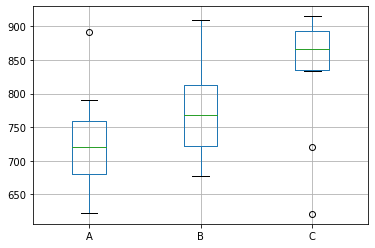

In [58]:
df = pd.DataFrame({'A':[892,623,721,678,723,790,720,670,690,771],
                  'B':[721,821,910,678,723,790,711,790,745,891],
                  'C':[621,915,888,721,894,834,841,912,845,889]})

df.boxplot(['A','B','C'])

In [59]:
f_result = stats.f_oneway(df['A'],df['B'],df['C'])

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print(f,p) # f통계량, pvalue

4.263 0.025


## [과제 1 ] One way ANOVA

In [89]:
import csv

f = open('ANOVA.csv', 'r')
reader = csv.reader(f)
dic = {}
i = 0

for row in reader:
    if i == 0:
        i += 1
        continue
    if row[2] not in dic:
        dic[row[2]] = []
        dic[row[2]].append(row[0])
    else:
        dic[row[2]].append(row[0])

df = pd.DataFrame(dic)

f_result = stats.f_oneway(df['a'],df['b'],df['c'],df['d'])

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("F 통계량: {}".format(f))
print("p-value: {}".format(p))

F 통계량: 4.172
p-value: 0.019


1. 가설설립
 * 귀무가설 : 강종별 2차정련 시간에 차이가 있다고 할 수 없다.
 * 대립가설 : 강종별 2차정련 시간에 차이가 있다고 할 수 있다.
 
 
2. 가설검정
 * 검정통계량 : 4.172
 * p-value : 0.019
 * 유의수준 : 0.05
 
 
3. 검정결과 판단
 * p-value < 유의수준 이므로 귀무가설을 기각한다.
 
 
4. 결론
 * 강종별 2차정련 시간에 차이가 있다고 할 수 있다.

# 상관/회귀분석

## 상관분석

### [연습] 상관분석

In [67]:
df1 = [1,2,3,4,4,5,6,6,7,8]
df2 = [23,29,49,64,74,87,96,97,109,119]

corr,pval = stats.pearsonr(df1,df2)

print(corr, "p-value: {0:0.3f}".format(pval))

# 귀무가설: 상관계수는 0이다
# 대립가설: 상관계수는 0이 아니다
# 즉, pval < a(유의수준) 이므로 귀무가설 기각
# 부품수리시간과 부품수간에 매우 강한 상관성이 있다고 할 수 있다.

0.9892262536728126 p-value: 0.000


## [과제 2] 상관분석

In [98]:
df1 = [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5]
df2 = [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]

corr,pval = stats.pearsonr(df1,df2)

print("corr: {}".format(corr))
print("p-value: {}".format(pval))


corr: -0.723107314935157
p-value: 0.0003152005510027819


1. 가설설립
 * 귀무가설 : 초코칩의 강도와 재료 반죽온도간에 상관성이 있다고 할 수 없다.
 * 대립가설 : 초코칩의 강도와 재료 반죽온도간에 상관성이 있다고 할 수 있다.
 
 
2. 가설검정
 * p-value : 0.000
 * 유의수준 : 0.05
 
 
3. 검정결과 판단
 * p-value < 유의수준 이므로 귀무가설을 기각한다.
 
 
4. 결론
 * 초코칩의 강도와 재료 반죽온도간에 상관성이 있다고 할 수 있다.

## 회귀분석

### [연습] 회귀분석

In [94]:
MINUTES = [1,2,3,4,4,5,6,6,7,8]
UNITS = [23,29,49,64,74,87,96,97,109,119]

MINUTES = sm.add_constant(MINUTES)
model = sm.OLS(UNITS,MINUTES)
result = model.fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     365.3
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           5.82e-08
Time:                        16:01:33   Log-Likelihood:                -29.401
No. Observations:                  10   AIC:                             62.80
Df Residuals:                       8   BIC:                             63.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1712      3.886      1.845      0.1

(array([1., 1., 0., 2., 1., 3., 0., 0., 1., 1.]),
 array([-7.53153153, -5.96756757, -4.4036036 , -2.83963964, -1.27567568,
         0.28828829,  1.85225225,  3.41621622,  4.98018018,  6.54414414,
         8.10810811]),
 <a list of 10 Patch objects>)

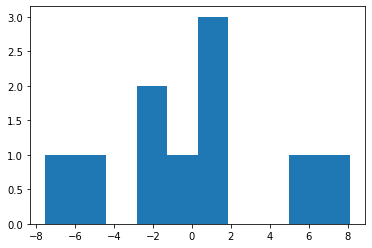

In [95]:
# 정규성 검정
plt.hist(result.resid)

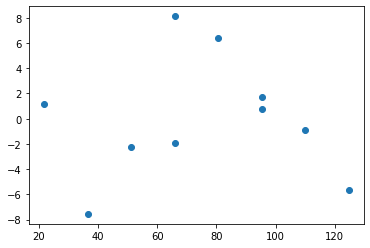

In [96]:
# 등분산성 검정
plt.scatter(result.fittedvalues, result.resid)

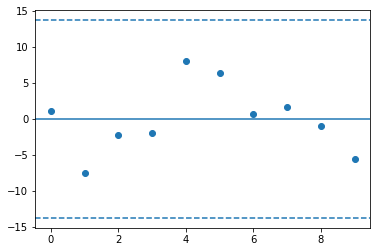

In [97]:
# 독립성 검정(관리도)
plt.scatter(range(0,10), result.resid, marker='o')
plt.axhline(y=0, linestyle="-")
plt.axhline(y=3*np.std(result.resid),linestyle="--")
plt.axhline(y=-3*np.std(result.resid),linestyle="--")

## [과제3] 단순선형회귀

In [99]:
STRENGTH = [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,
            36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5]
BTIME = [0.798922,0.84902,0.816163,0.758266,0.815894,0.807477,0.809068,0.7664,0.742243,
         0.751118,0.740629,0.751495,0.738863,0.827428,0.818172,0.740939,0.757128,0.804695,0.695121,0.735377]

STRENGTH = sm.add_constant(STRENGTH)
model = sm.OLS(BTIME,STRENGTH)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           1.95e-05
Time:                        16:18:42   Log-Likelihood:                 46.530
No. Observations:                  20   AIC:                            -89.06
Df Residuals:                      18   BIC:                            -87.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.135      0.017      0.9

(0.9451944828033447, 0.29996079206466675)

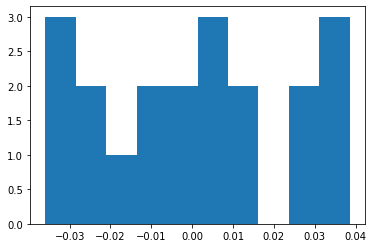

In [104]:
# 정규성 검정
plt.hist(result.resid)
shapiro(result.resid) # 정규성 없음

**[정규성]**
1. 가설설립
 * 귀무가설 : 정규성이 없다
 * 대립가설 : 정규성이 있다
 
 
2. 가설검정
 * 검정통계량 : 0.945
 * p-value : 0.299
 * 유의수준 : 0.05
 
 
3. 검정결과 판단
 * p-value > 유의수준 이므로 정규성이 없다
 
 
4. 결론
 * 정규성이 없다

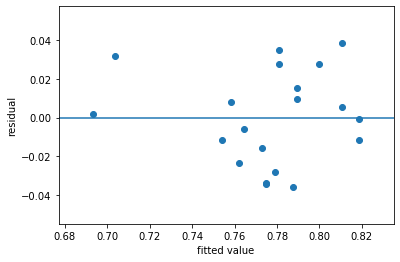

In [106]:
# 등분산성 검정
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="-")

**[등분산성]**
* 잔차들이 수평축 0을 중심으로 일정한 경향을 가지고 랜덤하게 나타나지 않았다.
* 예측값이 증가함에 따라 퍼진 정도가 증가하는 모습을 보인다.
* 따라서 등분산성을 하지 않는다고 할 수 있다.

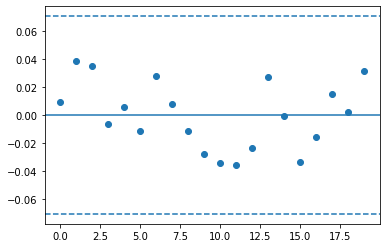

In [103]:
# 독립성 검정(관리도)
plt.scatter(range(0,20), result.resid, marker='o')
plt.axhline(y=0, linestyle="-")
plt.axhline(y=3*np.std(result.resid),linestyle="--")
plt.axhline(y=-3*np.std(result.resid),linestyle="--")

**[독립성]**
* 앞서 result.summary()의 결과값을 보면 Durbin-Watson 값이 1.128 임을 확인할 수 있다. 해당 값은 0과 2 사이에 존재하고, 0에 밀접하게 근접하지는 않기 때문에 약한 양의 상관관계라고 볼 수 있다.